# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "0a3f547761154cd89b5616aa3f34603e9902d002"
connection.set_access_token(API_TOKEN)

Access token is valid.


#### NOTE: Before creating or executing the strategy, ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png)

# Strategy Creation

## Import Strategy from pyalgostrategypool

In [5]:
! wget -O inverse_ema_scalping_crossover_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/inverse_ema_scalping.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' inverse_ema_scalping_crossover_us.py

--2023-12-01 22:53:01--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/inverse_ema_scalping.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2619 (2.6K) [text/plain]
Saving to: ‘inverse_ema_scalping_crossover_us.py’

inverse_ema_scalpin 100%[===================>]   2.56K  --.-KB/s    in 0s      

2023-12-01 22:53:01 (48.2 MB/s) - ‘inverse_ema_scalping_crossover_us.py’ saved [2619/2619]



In [6]:
from inverse_ema_scalping_crossover_us import StrategyInverseEMAScalpingRegularOrder as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 133800,
 'strategyId': '568bc41d0b44434299382020d2a69ea0'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('AMZN', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:AMZN'

## Setup Parameters

In [10]:
parameters = {
  'SMALLER_TIME_PERIOD': 12,
  'LARGER_TIME_PERIOD': 20,
}

In [11]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:AMZN', 
    lots=15,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds
)


Starting the strategy 'Inverse EMA Scalping Regular Order Strategy' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════╕
│ Config                  │ Value                                                 │
╞═════════════════════════╪═══════════════════════════════════════════════════════╡
│ Strategy Name           │ Inverse EMA Scalping Regular Order Strategy           │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                           │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:AMZN']                                       │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 15                                                    │
├─────────────────────────┼─────────────────────────────────────────

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (6)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [15]:
print(logs)

[2023-12-01 22:53:51] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-12-01 22:53:51] Sanity checks on cfg successful.
[2023-12-01 22:53:51] Currency set to "USD"
[2023-12-01 22:53:51] Setting up broker connection...
[2023-12-01 22:53:53] Starting ALPACAV2 in PAPER mode...
[2023-12-01 22:53:54] Broker connection has been setup successfully.
[2023-12-01 22:53:54] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-12-01 22:53:54] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-12-01 22:53:54] Welcome ALGOBULLS VIRTUAL USER!
[2023-12-01 22:53:54] Reading strategy...
[2023-12-01 22:53:54] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


## Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NASDAQ,AMZN,2022-06-22 11:30:00-04:00,SELL,15,$,110.10,,2022-06-22 15:30:00-04:00,BUY,15,$,109.11,,14.85,14.85,0,14.85
1,NASDAQ,AMZN,2022-06-28 12:30:00-04:00,BUY,15,$,108.37,,2022-06-28 13:30:00-04:00,SELL,15,$,108.37,,0.00,14.85,0,0.00
2,NASDAQ,AMZN,2022-06-28 13:30:00-04:00,BUY,15,$,108.37,,2022-06-28 14:30:00-04:00,SELL,15,$,108.37,,0.00,14.85,0,0.00
3,NASDAQ,AMZN,2022-06-28 14:30:00-04:00,BUY,15,$,108.37,,2022-06-28 15:30:00-04:00,SELL,15,$,108.37,,0.00,14.85,0,0.00
4,NASDAQ,AMZN,2022-07-05 11:30:00-04:00,SELL,15,$,110.34,,2022-07-05 15:30:00-04:00,BUY,15,$,111.51,,-17.55,-2.70,0,-17.55
5,NASDAQ,AMZN,2022-07-15 10:30:00-04:00,SELL,15,$,113.19,,2022-07-15 15:30:00-04:00,BUY,15,$,114.51,,-19.80,-22.50,0,-19.80
6,NASDAQ,AMZN,2022-07-28 09:30:00-04:00,SELL,15,$,121.57,,2022-07-28 15:30:00-04:00,BUY,15,$,120.99,,8.70,-13.80,0,8.70
7,NASDAQ,AMZN,2022-08-09 09:30:00-04:00,BUY,15,$,138.07,,2022-08-09 15:30:00-04:00,SELL,15,$,137.58,,-7.35,-21.15,0,-7.35
8,NASDAQ,AMZN,2022-08-10 10:30:00-04:00,SELL,15,$,141.64,,2022-08-10 15:30:00-04:00,BUY,15,$,142.48,,-12.60,-33.75,0,-12.60
9,NASDAQ,AMZN,2022-08-17 12:30:00-04:00,BUY,15,$,140.98,,2022-08-17 13:30:00-04:00,SELL,15,$,140.98,,0.00,-33.75,0,0.00


## Statistics Reports

### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-06-22
End Period          2023-07-27
Risk-Free Rate      0.0%
Time in Market      47.0%

Cumulative Return   -1.15%
CAGR﹪              -1.06%

Sharpe              -1.13
Prob. Sharpe Ratio  28.69%
Sortino             -1.62
Sortino/√2          -1.15
Omega               0.75

Max Drawdown        -2.08%
Longest DD Days     234

Gain/Pain Ratio     -0.25
Gain/Pain (1M)      -0.36

Payoff Ratio        1.1
Profit Factor       0.75
Common Sense Ratio  0.52
CPC Index           0.34
Tail Ratio          0.69
Outlier Win Ratio   9.14
Outlier Loss Ratio  2.44

MTD                 0.03%
3M                  -0.04%
6M                  -0.62%
YTD                 -0.67%
1Y                  -0.23%
3Y (ann.)           -1.06%
5Y (ann.)           -1.06%
10Y (ann.)          -1.06%
All-time (ann.)     -1.06%

Avg. Drawdown       -1.68%
Avg. Drawdown Days  173
Recovery Factor     -0.55
Ulcer Index         0.01
Serenity Index  

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-06-22
End Period                 2023-07-27
Risk-Free Rate             0.0%
Time in Market             47.0%

Cumulative Return          -1.15%
CAGR﹪                     -1.06%

Sharpe                     -1.13
Prob. Sharpe Ratio         28.69%
Smart Sharpe               -1.06
Sortino                    -1.62
Smart Sortino              -1.53
Sortino/√2                 -1.15
Smart Sortino/√2           -1.08
Omega                      0.75

Max Drawdown               -2.08%
Longest DD Days            234
Volatility (ann.)          3.7%
Calmar                     -0.51
Skew                       1.05
Kurtosis                   8.16

Expected Daily %           -0.02%
Expected Monthly %         -0.09%
Expected Yearly %          -0.58%
Kelly Criterion            -13.24%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.4%
Expected Shortfall (cVaR)  -0.4%

Max Consecutive Wins

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-12-05,2023-06-29,2023-07-27,234,-2.084908,-2.070042
2,2022-07-05,2022-08-26,2022-10-26,112,-1.277756,-1.210506


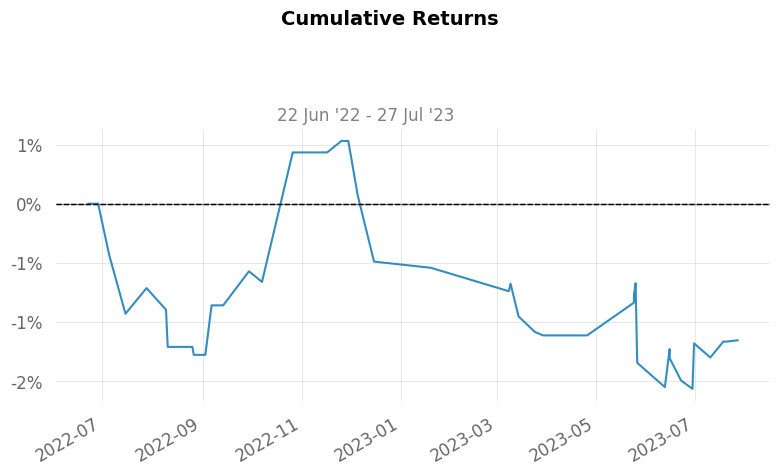

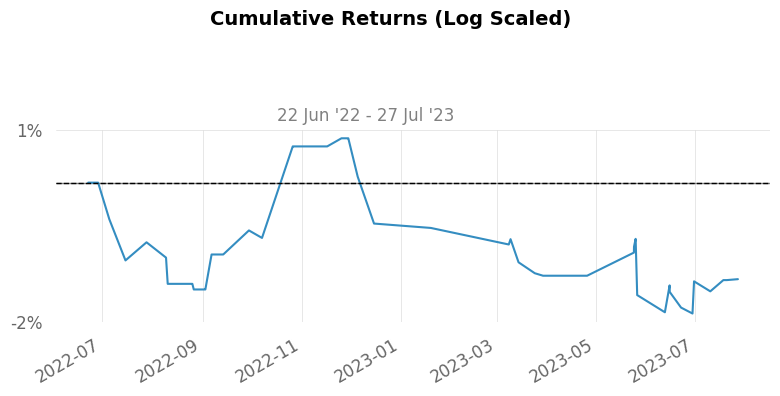

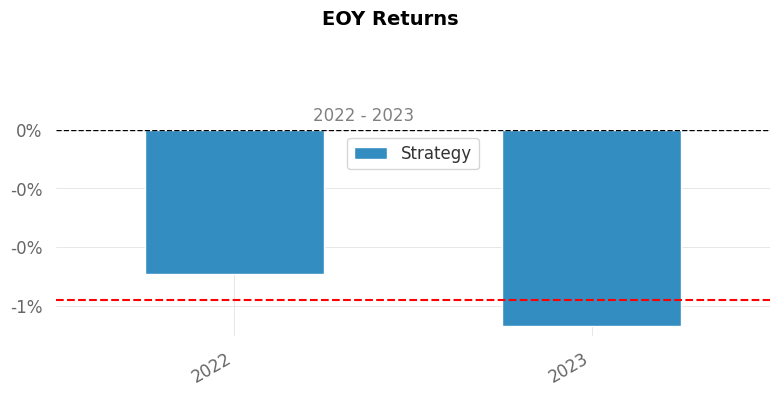

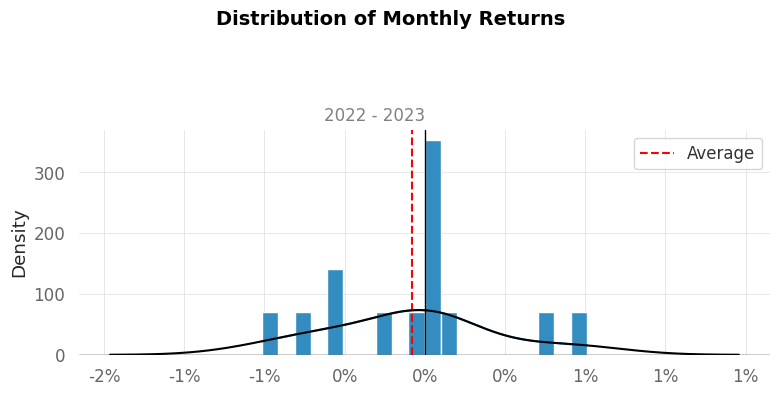

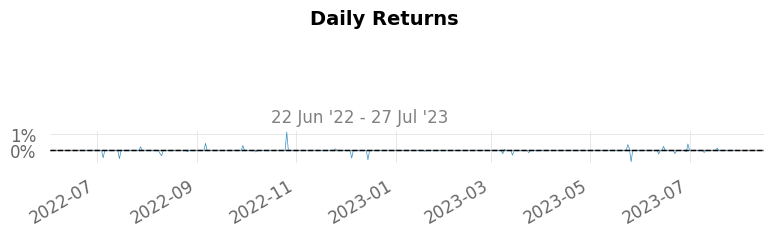

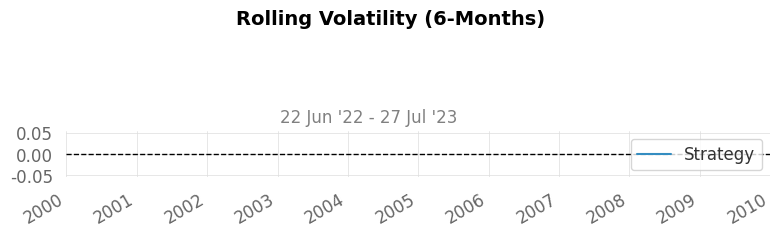

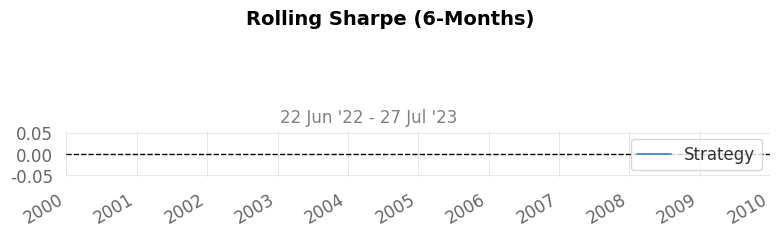

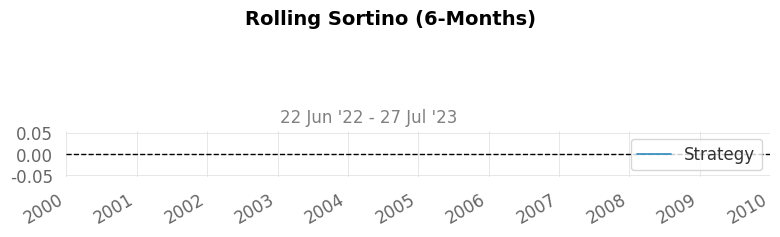

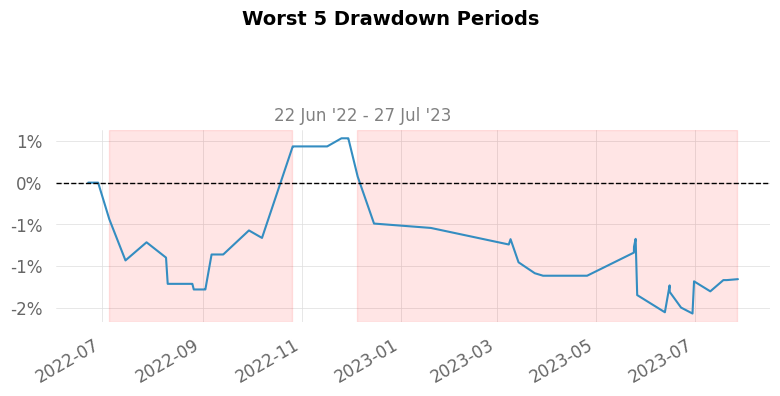

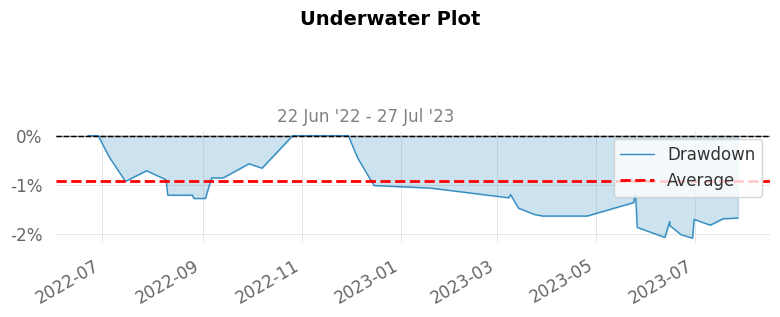

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


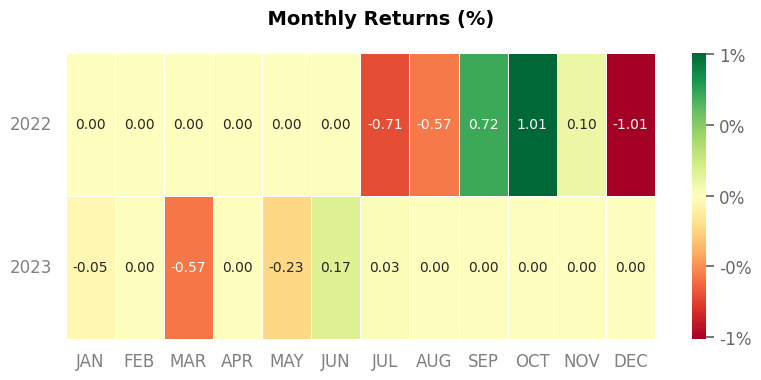

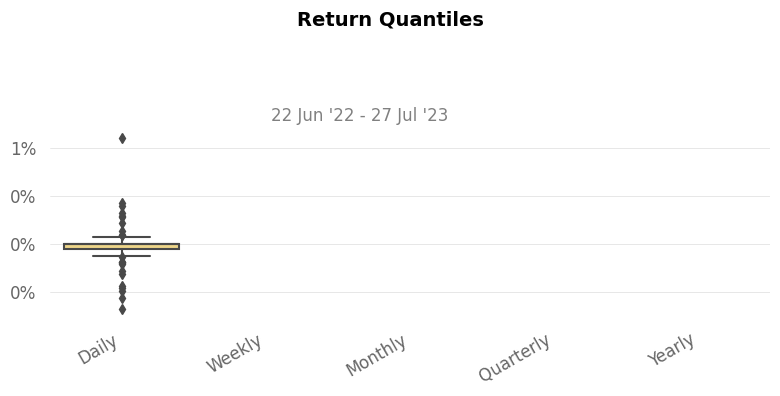

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 16db3ede43684b3b8a518c5b131d2d5a |
| Transaction Type | BUY                              |
| Instrument       | NASDAQ:AMZN                      |
| Quantity         | 15                               |
| Price            | $131.41                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-12-01T17:27:53.618320Z | COMPLETE               |
| 2023-12-01T17:27:53.618302Z | OPEN                   |
| 2023-12-01T17:27:53.618283Z | OPEN PENDING           |
| 2023-12-01T17:27:53.618263Z | VALIDATION PENDING     |
| 2023-12-01T17:27:53.618223Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | d452bf217b744557a

## Papertrading

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:AMZN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute'
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
broking_details = {
    'brokerName': 'ALPACA LIVE',
    'credentialParameters': {}
}

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='9:00 -0400', 
    end='15:30 -0400', 
    instruments='NASDAQ:AMZN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)